### Polynomial Regression Example


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [27]:
print(housing.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [28]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [30]:
housing_df["MedHouseVal"] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [31]:
housing_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

### Exploratory Data Analysis (EDA)

In [33]:
housing_df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [36]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<Figure size 1000x600 with 0 Axes>

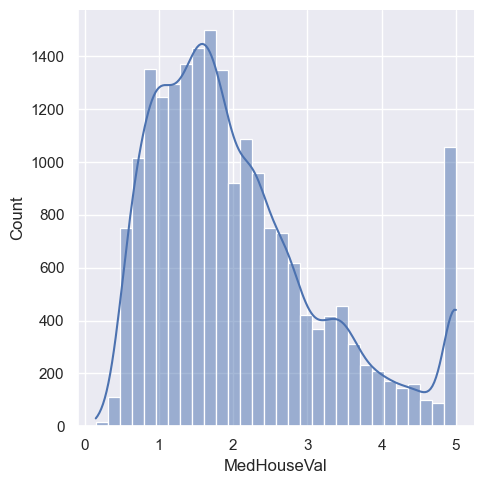

In [75]:
from scipy import stats
plt.figure(figsize=(10,6))
sns.displot(housing_df["MedHouseVal"], bins=30,  kde=True)
plt.show();

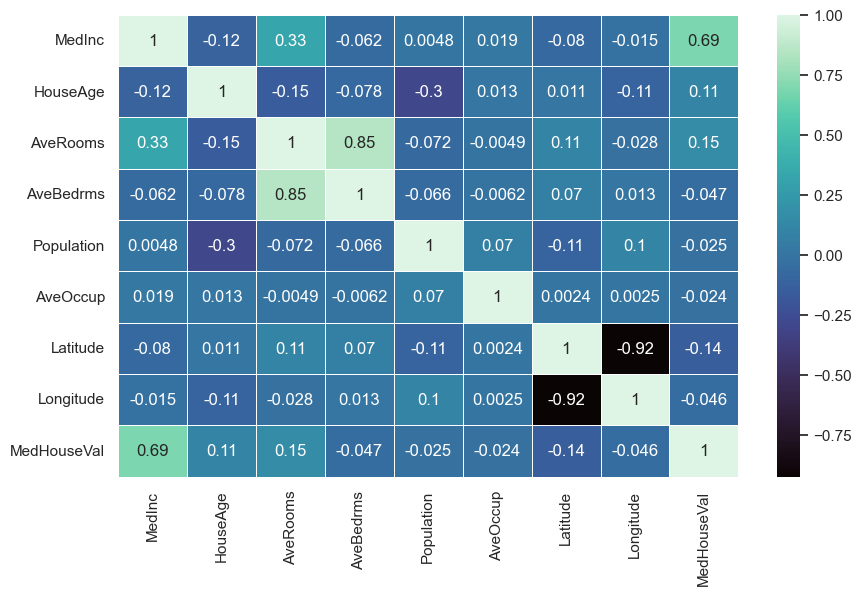

In [79]:
corr_house = housing_df.corr()
sns.heatmap(corr_house, annot=True,linewidth=0.5, cmap="mako")
plt.show()

* We can see that MedHouseVal is highly correlated with MedInc value. 
* Just to see negative correlation, we can look up to it's correlation between Latitude visually.


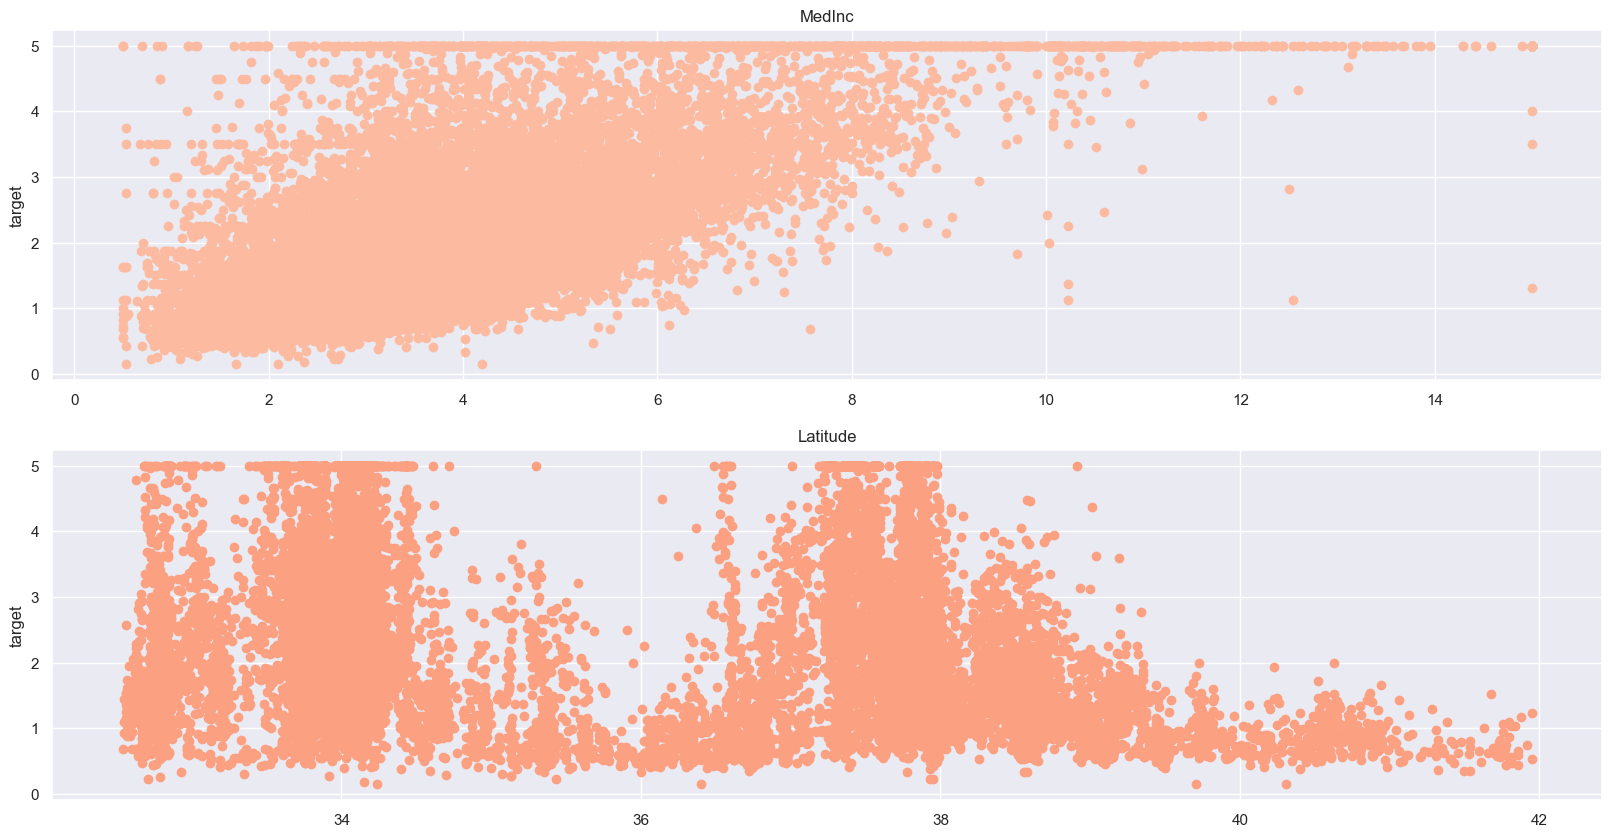

In [119]:
plt.figure(figsize=(20,10))

features = ["MedInc", "Latitude"]
target = housing_df["MedHouseVal"]

for i, col in enumerate(features):
    plt.subplot(2, 1 , i+1)
    x = housing_df[col]
    y = target
    plt.scatter(x, y, marker="o")
    sns.set_palette("Reds", 2)
    plt.title(col)
    plt.ylabel("target")
    

### Preparing the data 

In [120]:
X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [125]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14448, 8)
(6192, 8)
(14448,)
(6192,)


### Training and testing the model

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)

rmse = (np.sqrt(mean_squared_error(y_test, y_pred_reg)))
r2 = r2_score(y_test, y_pred_reg)

print(f" The model performance for test RMSE: {rmse}, r2 score: {r2}");

 The model performance for test RMSE: 0.7279308626715596, r2 score: 0.6101928931230342


In [139]:
y_pred_reg1 = reg.predict(X_train)

rmse = (np.sqrt(mean_squared_error(y_train, y_pred_reg1)))
r2 = r2_score(y_train, y_pred_reg1)

print(f" The model performance for train RMSE: {rmse}, r2 score: {r2}");

 The model performance for train RMSE: 0.7226068920018651, r2 score: 0.6042969955255213


In [144]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = PolynomialFeatures(degree = 3) 

X_poly = polynomial_regression.fit_transform(X)


reg_2 = LinearRegression()
reg_2.fit(X_poly,y)

y_pred_poly = reg_2.predict(X_poly)

rmse = (np.sqrt(mean_squared_error(y, y_pred_poly)))
r2 = r2_score(y, y_pred_poly)

print(f" The model performance with polynomial featured RMSE: {rmse}, r2 score: {r2}");



 The model performance with polynomial featured RMSE: 0.5912035340704828, r2 score: 0.7375077616850414
